In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

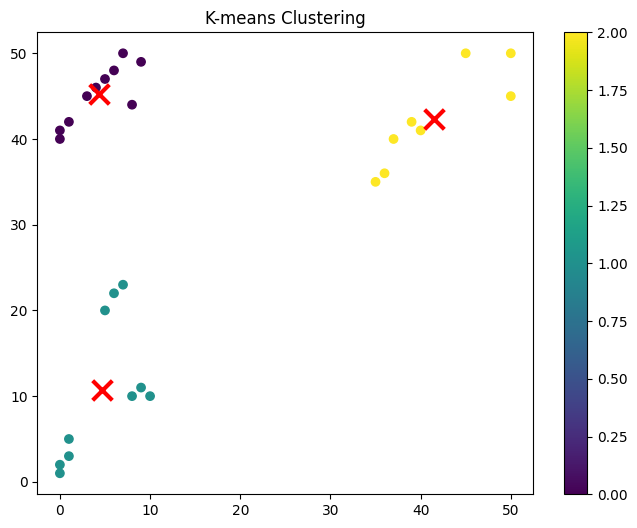

In [4]:
# def generate_data(n_samples=300):
#     np.random.seed(42)
#     X = np.random.randn(n_samples, 2)
#     return X

def kmeans(X, k=3, max_iters=100):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    for _ in range(max_iters):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
            
        centroids = new_centroids
    
    return labels, centroids

def plot_clusters(X, labels, centroids):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
    plt.title('K-means Clustering')
    plt.colorbar(scatter)
    plt.show()

if __name__ == "__main__":
    X = pd.read_excel('cluster_data.xlsx').values
    
    labels, centroids = kmeans(X, k=3)
    
    plot_clusters(X, labels, centroids)

In [10]:
from sklearn.cluster import KMeans
X = pd.read_excel('cluster_data.xlsx').values
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X)
new_data = np.random.rand(10, 2)
predictions = kmeans.predict(new_data)
print(predictions)


[2 2 2 2 2 2 2 2 2 2]
